In [1]:
%%

codeRoot = './code'
% if isempty(codeRoot)
%     codeRoot = matlab.desktop.editor.getActiveFilename();
%     codeRoot = regexprep(codeRoot,'/[^/]*$','')    
% end

cLoadPath = sprintf('%s/utils/loadProjectPath.m',codeRoot);
run(cLoadPath)

cd(envVar.outDir);

%% Settings

envVar.reRunAnalysis = 0;


codeRoot =

    './code'

Loading Lung Tumor Evolution pkg enviornment
            pkgRoot: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution'
            codeDir: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/code/'
    externalCodeDir: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/external/'
           dataRoot: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/'
          intRefDir: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/data/intRefDir/'
             outDir: '/ahg/regevdata/users/mhofree/projects/cancer_SC/pkg/lungTumorEvolution/output/'



In [2]:
%% Data

mmLungPlate_fQC = load([ envVar.dataRoot 'mmLungKP_timecourse.mat' ]);

%%

timeID = mmLungPlate_fQC.timesimple;
zSel = strcmp(timeID,'02_KorKP_early_ND');
timeID(zSel) = mmLungPlate_fQC.typeID(zSel);
tabFilter(timeID);

          Value     Count    Percent
  01_T_early_ND       206      5.29%
     02_K_2w_ND       111      2.85%
    03_KP_2w_ND        31      0.80%
    04_K_12w_ND       455     11.69%
    05_K_30w_ND       505     12.98%
   06_KP_12w_ND       491     12.62%
   07_KP_20w_ND       538     13.83%
   08_KP_30w_ND      1554     39.94%
---------------
         Total:      3891    100.00%


In [3]:
%% Load gene sets 

zCellHallmark = load([ envVar.dataRoot 'refData/geneSetCollectionMouse/msigDB_v62_symbol_homMM_h_all.mat'])
zCellMarker = load([ envVar.dataRoot 'refData/geneSetCollectionMouse/cellMarker_mouse_set_mm.mat'])
zMCAset = load([ envVar.dataRoot 'refData/geneSetCollectionMouse/mca_STable4_top.mat'])

%%
clear zCellSelected 

zCellSelected.AV2 = zMCAset.Alveolar_type_II_cell;
zCellSelected.AV1 = zCellMarker.s1147_pm24739965_Lung_Normal_cell_Type_I_pneumocyte_24739965
zCellSelected.Intestinal_epithelial_cell = zMCAset.Intestinal_epithelial_cell;
zCellSelected.Intestinal_TA = zCellMarker.s972_pm26287467_Intestinal_crypt_Normal_cell_Transit_amplifying;
zCellSelected.Hepatocyte = zMCAset.Hepatocyte;
zCellSelected.Mouse_embryonic_fibroblast = zMCAset.MEF_Cultured;
zCellSelected.Embryonic_stem_cell = zMCAset.Embryonic_stem_cell
zCellSelected.EMT = zCellHallmark.s30_HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION

%%

runSection = 0;
if envVar.reRunAnalysis || runSection

    zopts = [];
    zopts.geneID = 'geneSymbol';
    zopts.bkgScoreSmpNum = 1000;
    zGStestCellSelected = genSignatureScoreSimple(mmLungPlate_fQC,zCellSelected,[],mmLungPlate_fQC.annot.clusterK12,zopts);

else
    zGStestCellSelected = load([ envVar.dataRoot 'mmLungKP_timecourse_GStestCellType.mat' ])
end
%%

zP = (struct2array(zGStestCellSelected.clustE) + 1)/(1001)

%

zSel = true(size(zP));
sum(zSel)
zSelSig = mafdr(zP,'BH',1) < 0.1

%

zCl = mergeStringPair('Cl%s%02d','',mmLungPlate_fQC.annot.clusterK12);

zGSscore = cell2mat(struct2cell(zGStestCellSelected.outScaledDiff)');
[zGSmean,~,zBid] = summarize_subset_value((zGSscore)',zCl)

%

zFlist = fieldnames(zGStestCellSelected.outScaledDiff);
zFlist = zFlist(zSel);

zGSmean = zGSmean(zSel,:);
zGSnorm = zscore(zGSmean,[],2)

%
fixNames = @(x)regexprep(x,'_','-');


zCellHallmark = 

  struct with fields:

               s1_HALLMARK_TNFA_SIGNALING_VIA_NFKB: {194x1 cell}
                               s2_HALLMARK_HYPOXIA: {193x1 cell}
               s3_HALLMARK_CHOLESTEROL_HOMEOSTASIS: {74x1 cell}
                       s4_HALLMARK_MITOTIC_SPINDLE: {193x1 cell}
            s5_HALLMARK_WNT_BETA_CATENIN_SIGNALING: {41x1 cell}
                    s6_HALLMARK_TGF_BETA_SIGNALING: {52x1 cell}
               s7_HALLMARK_IL6_JAK_STAT3_SIGNALING: {83x1 cell}
                            s8_HALLMARK_DNA_REPAIR: {143x1 cell}
                        s9_HALLMARK_G2M_CHECKPOINT: {188x1 cell}
                            s10_HALLMARK_APOPTOSIS: {159x1 cell}
                      s11_HALLMARK_NOTCH_SIGNALING: {31x1 cell}
                         s12_HALLMARK_ADIPOGENESIS: {187x1 cell}
              s13_HALLMARK_ESTROGEN_RESPONSE_EARLY: {191x1 cell}
               s14_HALLMARK_ESTROGEN_RESPONSE_LATE: {203x1 cell}
                    s15_HALLMARK_ANDROGEN_RESPONSE: {


zopts = 

  struct with fields:

           doSortX: 0
           doSortY: 0
    addDendrogramX: 0


zopts = 

  struct with fields:

           doSortX: 0
           doSortY: 0
    addDendrogramX: 0
    addDendrogramY: 0


zopts = 

  struct with fields:

                doSortX: 0
                doSortY: 0
         addDendrogramX: 0
         addDendrogramY: 0
    doLeafOptimalOrderY: 0


zopts = 

  struct with fields:

                doSortX: 0
                doSortY: 0
         addDendrogramX: 0
         addDendrogramY: 0
    doLeafOptimalOrderY: 0
    doLeafOptimalOrderX: 0


zOrdTX =

     []


zf = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [1 1 1]
    Position: [1 1 1800 1800]
       Units: 'pixels'

  Use GET to show all properties


zf = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [1 1 1]
    Position: [81 81 1341 1052]
       Units: 'pixels'

  Use GET to show all properties



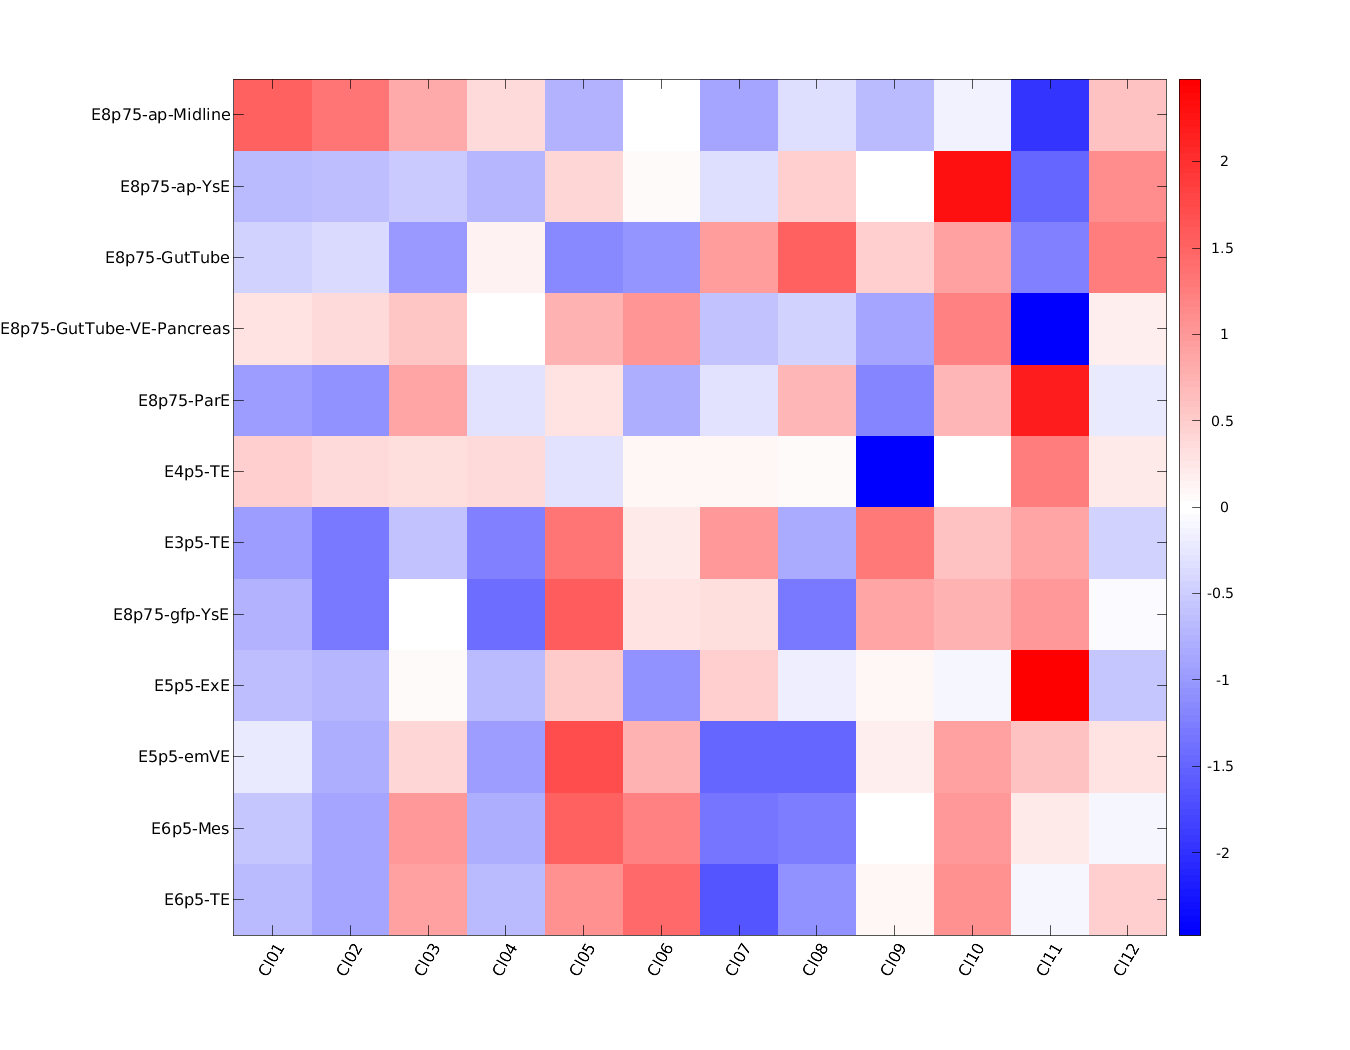

In [16]:
%plot -s 1350,1050

zopts =[];

zopts.doSortX = 0;
zopts.doSortY = 0;
zopts.addDendrogramX =0
zopts.addDendrogramY = 0
zopts.doLeafOptimalOrderY = 0
zopts.doLeafOptimalOrderX = 0

zf = plot_heatmap_annot(zGSnorm,fixNames(zFlist),fixNames(zBid),[],[],zopts)

zf.Position = [81 81 1341 1052]

In [5]:
%% Generate Embryo gene signatures - Cao2019
% Based on supplementary tables of differentially expressed genes

runSection = 0;
if envVar.reRunAnalysis || runSection

    zCaoEmbryo = readtable([ envVar.dataRoot 'refData/Cao2019/41586_2019_969_MOESM3_ESM_S2.csv' ]);
    zCaoEmbryoTypeTable = readtable([ envVar.dataRoot 'refData/Cao2019/41586_2019_969_MOESM3_ESM_S3.csv' ]);

    %%

    zCaoEmbryoTypeTable = zCaoEmbryoTypeTable(1:38,:)
    zCaoEmbryoTypeTableMarker = arrayfun(@(x)strsplit(zCaoEmbryoTypeTable.MarkersUsedForCellTypeIdentification{x},', '),1:38,'unif',0);

    %% Global

    zSel = strgrep(zCaoEmbryo.Group,'Main');
    zCaoEmbryoSub = zCaoEmbryo(zSel,:);
    zCaoEmbryoSub = zCaoEmbryoSub(zCaoEmbryoSub.qval < 0.1,:);

    %%

    topN = @(x,n)x(1:min(length(x),n));

    %%

    zNames = mergeStringPair('Cao2019Embryo_main',matlab.lang.makeValidName(zCaoEmbryoTypeTable.CellType))

    %%

    tabFilter(zCaoEmbryoSub.max_cluster)
    [zClList,~,~,zCnt,zPos] = fastUnique(zCaoEmbryoSub.max_cluster);
    [zClList,zidx] = sort(zClList);
    zPos = zPos(zidx);
    zCnv = zCnt(zidx);

    %%
    zCaoGeneSetMainKnee = [];

    for zi = 1:40

         zCsel = zPos{zi};
         zSubGene = zCaoEmbryoSub.gene_short_name(zCsel);
         zSubStat = log2(zCaoEmbryoSub.max_expr(zCsel)./zCaoEmbryoSub.second_expr(zCsel));
         [zz,zidx] = sort(zSubStat,'descend','missingplacement','last');
         zSubGene = zSubGene(zidx);

        if length(zz)>5
            [zKneePt,zidx] = knee_pt(zz);
        else
            zKneePt=5;
            zidx = nan;
        end

        zTopList = topN(zSubGene,max(zidx,20));       
        zCaoGeneSetMainKnee{zi} = zTopList;
    end

    %%

    zSel = setdiff(1:40,[22 27])
    zCaoGeneSetMainKnee      = zCaoGeneSetMainKnee(zSel);

    for zi = 1:38
        zl = [ zCaoGeneSetMainKnee{zi}(:); zCaoEmbryoTypeTableMarker{zi}(:) ];
        length(zl)
        zl = fastUnique(zl);
        length(setdiff(zl,union(zCaoGeneSetMainKnee{zi},zCaoEmbryoTypeTableMarker{zi}(:)))) 
        zCaoGeneSetMainKneeAug{zi} = setdiff(zl,'NA');
    end

    zCaoGeneSetMainKnee = cell2struct(zCaoGeneSetMainKneeAug(:),zNames(:))
    
    %% Epithelial cells only
    
    zCaoS5 = readtable([ envVar.dataRoot 'refData/Cao2019/41586_2019_969_MOESM3_ESM_S5.csv' ]);

    zCaoS5_sub = zCaoS5(zCaoS5.Main_cluster_number == 6,:);
    zCaoS5_sub = sortrows(zCaoS5_sub,5);

    zCaoEpiMarker = arrayfun(@(x)strsplit(zCaoS5_sub.Minimum_defining_markers{x},','),1:29,'unif',0)

    zSel = strgrep(zCaoEmbryo.Group,'6');
    zCaoEmbryoSub = zCaoEmbryo(zSel,:);
    zCaoEmbryoSub = zCaoEmbryoSub(zCaoEmbryoSub.qval < 0.1,:);

    tabFilter(zCaoEmbryoSub.max_cluster)
    [zClList,~,~,zCnt,zPos] = fastUnique(zCaoEmbryoSub.max_cluster);

    [zClList,zidx] = sort(zClList);
    zPos = zPos(zidx);
    zCnv = zCnt(zidx);

    zCaoGeneSetEpiKnee = [];
    %

    for zi = 1:length(zClList)

         zCsel = zPos{zi};
         zSubGene = zCaoEmbryoSub.gene_short_name(zCsel);
         zSubStat = log2(zCaoEmbryoSub.max_expr(zCsel)./zCaoEmbryoSub.second_expr(zCsel));
         [zz,zidx] = sort(zSubStat,'descend','missingplacement','last');
         zSubGene = zSubGene(zidx);

        zCaoGeneSetEpiTopAll{zi} = zSubGene;
        if length(zz)>5
            [zKneePt,zidx] = knee_pt(zz);
        else
            zKneePt=5;
            zidx = nan;
        end

        zTopList = topN(zSubGene,max(zidx,20));       
        zCaoGeneSetEpiKnee{zi} = zTopList;

        fprintf('Cl %d) %f\t%f\t%f\t Knee=%f KneeIdx=%d/%d\n',zi,min(topN(zz,50)),min(topN(zz,100)),min(topN(zz,200)),zKneePt,zidx,length(zz));       
    end

    %%     
    
    zNames = mergeStringPair('Cao2019Embryo_epi',matlab.lang.makeValidName(zCaoS5_sub.Sub_cluster_name))
    zNames{end} =   'Cao2019Embryo_epi_NA2'

    for zi = 1:29
        zl = [ zCaoGeneSetEpiKnee{zi}(:); zCaoEpiMarker{zi}(:) ];
        length(zl)
        zl = fastUnique(zl);
        length(setdiff(zl,union(zCaoGeneSetEpiKnee{zi},zCaoEpiMarker{zi}(:)))) 
        zCaoGeneSetEpiKneeAug{zi} = setdiff(zl,'NA');
    end
    %% 
    zCaoGeneSetEpiKnee = cell2struct(zCaoGeneSetEpiKneeAug',zNames)
    
else
    zCaoGeneSetMainKnee = load([ envVar.dataRoot 'refData/embryoGeneSetsCao' ]);
    zCaoGeneSetEpiKnee = load([ envVar.dataRoot 'refData/embryoGeneSetsCaoEpi' ]);
end

In [6]:

%% Nowotschin2019, DEG were recalculated based on published data using a a Wilcoxon Ranksum test.

zDEG_embryoNowotschin2019 = load([ envVar.dataRoot 'refData/Nowotschin2019/DEG/mmEmbryo10x_DEG_cellTypeTP_by_slice.mat' ])

%%

zTPlist = setdiff(fieldnames(zDEG_embryoNowotschin2019),'geneID');
clear zEmbryoTopM

for j = 1:length(zTPlist)

    zTp = zTPlist{j}

    zDEG = zDEG_embryoNowotschin2019.(zTp);
    
    %%
    if isfield(zDEG,'maxLogR') && ~isempty(zDEG.maxLogR)
        zDEG_pos = zDEG.auc > 0.60 & zDEG.fdr < 0.1 & zDEG.logR > log2(1.25) & zDEG.expT > 0.1 & zDEG.maxLogR > log2(1);
        sum(zDEG_pos)
    else
        zDEG_pos = zDEG.auc > 0.60 & zDEG.fdr < 0.1 & zDEG.logR > log2(1) & zDEG.expT > 0.1;
        sum(zDEG_pos)
    end

    %%
    zopts.summaryGenes = 100;
    %zopts.filterSubset = 200;   
    zopts.doWrite = 0;    

    [~,zSummaryTable] = extractWriteDEGtableByFlatIn(zDEG,zDEG_embryoNowotschin2019.geneID,zDEG_pos,zDEG.auc,[],zopts);

    %% 
    zBatchID = mergeStringPair(zTp,matlab.lang.makeValidName(zDEG.outClustNames));

    for i = 1:length(zBatchID)
        zSub = table2cell(zSummaryTable(:,i));
        zSub(isemptycell(zSub)) = [];
        if ~isempty(zSub)
            zEmbryoTopM.(zBatchID{i}) = zSub;
        end
    end
    
end

%%

zEmbryoTopExtCao = zEmbryoTopM;
zEmbryoTopExtCao.Cao2019Embryo_main_EpithelialCells = zCaoGeneSetMainKnee.Cao2019Embryo_main_EpithelialCells;
zEmbryoTopExtCao.Cao2019Embryo_main_Hepatocytes = zCaoGeneSetMainKnee.Cao2019Embryo_main_Hepatocytes;

zEmbryoTopExtCao.Cao2019Embryo_epi_LungEpithelialTrajectory_1_of_1 = zCaoGeneSetEpiKnee.Cao2019Embryo_epi_LungEpithelialTrajectory_1_of_1;
zEmbryoTopExtCao.Cao2019Embryo_epi_Midgut_HindgutEpithelialTrajectory_1_of_3 = zCaoGeneSetEpiKnee.Cao2019Embryo_epi_Midgut_HindgutEpithelialTrajectory_1_of_3;
zEmbryoTopExtCao.Cao2019Embryo_epi_Midgut_HindgutEpithelialTrajectory_2_of_3 = zCaoGeneSetEpiKnee.Cao2019Embryo_epi_Midgut_HindgutEpithelialTrajectory_2_of_3;
zEmbryoTopExtCao.Cao2019Embryo_epi_Midgut_HindgutEpithelialTrajectory_3_of_3 = zCaoGeneSetEpiKnee.Cao2019Embryo_epi_Midgut_HindgutEpithelialTrajectory_3_of_3;
%%
zEmbryoTopExtCao


zDEG_embryoNowotschin2019 = 

  struct with fields:

     E8p75_ap: [1x1 struct]
        E8p75: [1x1 struct]
         E4p5: [1x1 struct]
         E3p5: [1x1 struct]
    E8p75_gfp: [1x1 struct]
         E5p5: [1x1 struct]
         E6p5: [1x1 struct]
         E7p5: [1x1 struct]
       geneID: {20897x1 cell}


zTp =

    'E3p5'


ans =

        1564        1668

C1) found 1564 genes
Dropping empty P (0)
Nothing to subset (selecting all)
C2) found 1668 genes
Dropping empty P (0)
Nothing to subset (selecting all)

zTp =

    'E4p5'


ans =

        1275        1917        1006

C1) found 1275 genes
Dropping empty P (0)
Nothing to subset (selecting all)
C2) found 1917 genes
Dropping empty P (0)
Nothing to subset (selecting all)
C3) found 1006 genes
Dropping empty P (0)
Nothing to subset (selecting all)

zTp =

    'E5p5'


ans =

   440   718   573   354   444

C1) found 440 genes
Dropping empty P (0)
Nothing to subset (selecting all)
C2) found 718 genes
Dropping empty P (0)
Nothing to subs

In [7]:
%%
runSection = 0;
if envVar.reRunAnalysis || runSection
    
    zopts = [];
    zopts.geneID = 'geneSymbol';
    zopts.bkgScoreSmpNum = 10000;

    zGStestEmbryoPeer = genSignatureScoreSimple(mmLungPlate_fQC,zEmbryoTopExtCao,[],mmLungPlate_fQC.annot.clusterK12,zopts);

    %%
else
    zGStestEmbryoPeer = load([ envVar.dataRoot 'mmLungKP_timecourse_GStest_embryo.mat' ])
    zGStestEmbryoPeer = zGStestEmbryoPeer.zGStestEmbryoPeer;
end


zGStestEmbryoPeer = 

  struct with fields:

    zGStestEmbryoPeer: [1x1 struct]




zP =

  Columns 1 through 7

    0.9354    1.0000    0.1411    0.0006    0.0015    0.4956    0.0127

  Columns 8 through 14

    0.8161    0.4625    0.0914    0.1863    0.9596    0.3573    0.0929

  Columns 15 through 21

    0.7148    0.1603    0.2933    0.0007    0.0369    0.7395    0.0188

  Columns 22 through 28

    0.2715    0.2337    0.3942    0.0002    0.4280    0.0017    1.0000

  Columns 29 through 35

    0.2789    1.0000    0.4184    0.1441    0.0032    0.9345    0.0199

  Columns 36 through 42

    0.1165    0.0002    0.4338    0.0378    0.0030    0.0039    0.9511

  Columns 43 through 49

    0.1251    0.4233    0.0212    0.0008    0.1447    1.0000    0.0936

  Columns 50 through 56

    0.2715    0.1327    0.0002    0.0001    0.0071    0.2539    0.1390

  Column 57

    0.0012


zSel =

  1x57 logical array

  Columns 1 through 19

   0   0   0   1   1   0   1   0   0   0   0   0   0   0   0   0   0   1   0

  Columns 20 through 38

   0   1   0   0   0   1   0   1   0 

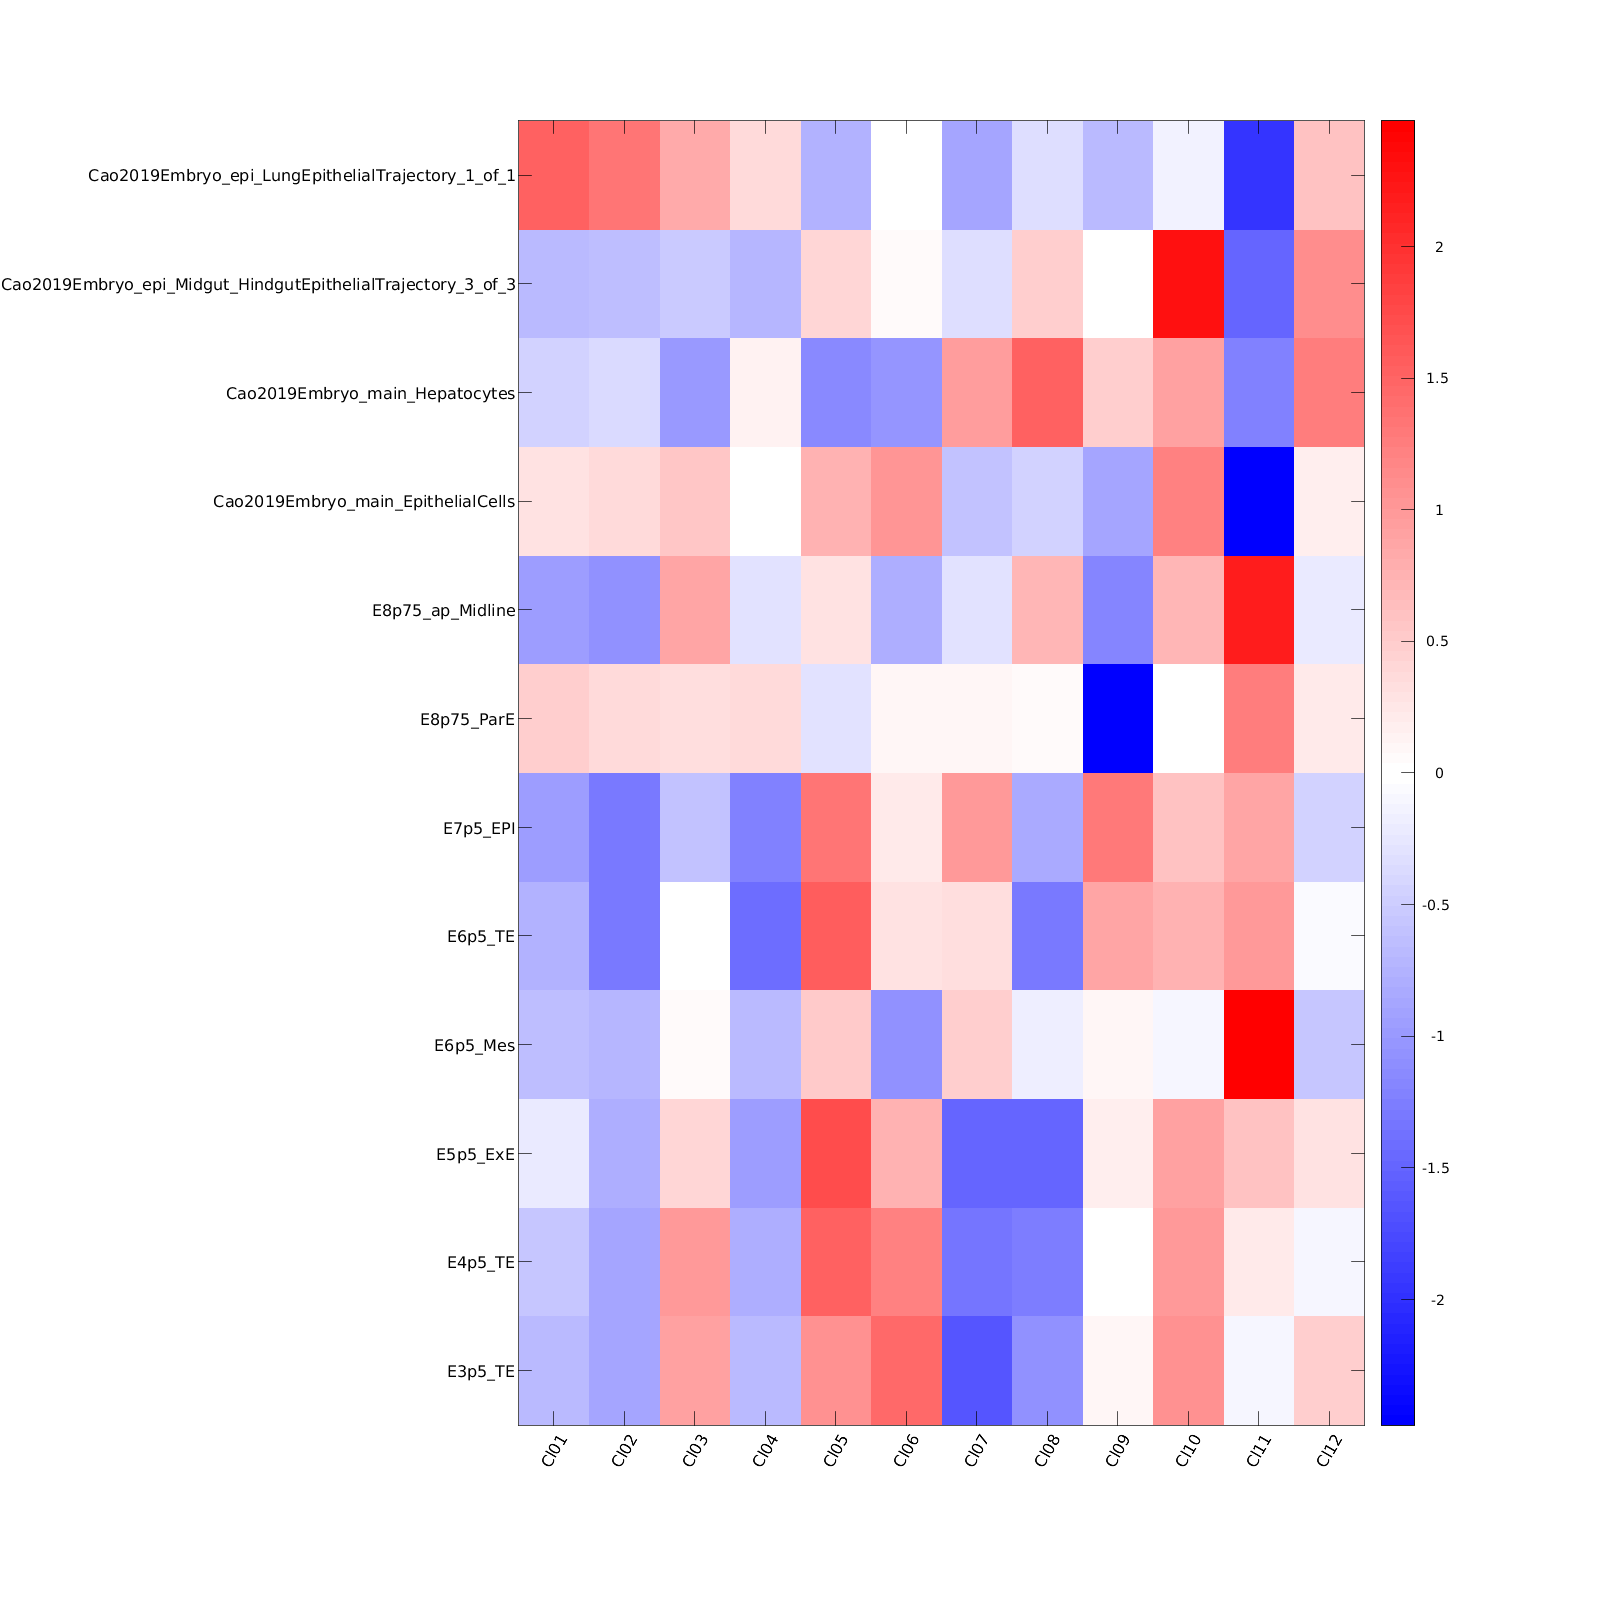

In [17]:
%plot -s 1600,1600
%% Plot heatmap for significant embryo signatures

zP = (struct2array(zGStestEmbryoPeer.clustE) + 1)/(10001)

zSel = mafdr(zP,'BH',1) < 0.1
sum(zSel)

zCl = mergeStringPair('Cl%s%02d','',mmLungPlate_fQC.annot.clusterK12);

zGSscore = cell2mat(struct2cell(zGStestEmbryoPeer.outScaledDiff)');
[zGSmean,~,zBid] = summarize_subset_value((zGSscore)',zCl);

%%

zFlist = fieldnames(zGStestEmbryoPeer.outScaledDiff);
zFlist = zFlist(zSel);
zGSmean = zGSmean(zSel,:);

fixNames = @(x)regexprep(x,'_','-');


[zFlistSort,zIdx] = sort(zFlist);
zIdx = [ zIdx(5:end); zIdx(3); zIdx(4); zIdx(2); zIdx(1)];
zIdx = flipud(zIdx);

zFixedList = zFlist(zIdx);
zGSnorm = zscore(zGSmean(zIdx,:),[],2);
[zz,zi] = sort(zGSnorm,'descend')


zz = unique([ setdiff(unique(zi(1,:)),6) 4 3 13 7 8]);

zSel = trueV(zz,length(zFixedList));
zFixedList = zFixedList(zSel);
zGSnorm = zGSnorm(zSel,:);


%% 
zopts =[];

zopts.doSortX = 0;
zopts.doSortY = 0;
zopts.addDendrogramX =0
zopts.addDendrogramY = 0
zopts.doLeafOptimalOrderY = 0
zopts.doLeafOptimalOrderX = 0

zf = plot_heatmap_annot(zGSnorm,zFixedList,fixNames(zBid),[],[],zopts)
zf.Position = [87 1 1664 1704];


zord =

         262
        1873
       16238


ans =

  3x1 cell array

    {'Nkx2-1'}
    {'Hnf4a' }
    {'Hmga2' }


zopts = 

  struct with fields:

        nRow: 1
        nCol: 3
    plotSize: [1 1 1999 443]


zf =

  1x1 cell array

    {1x1 Figure}



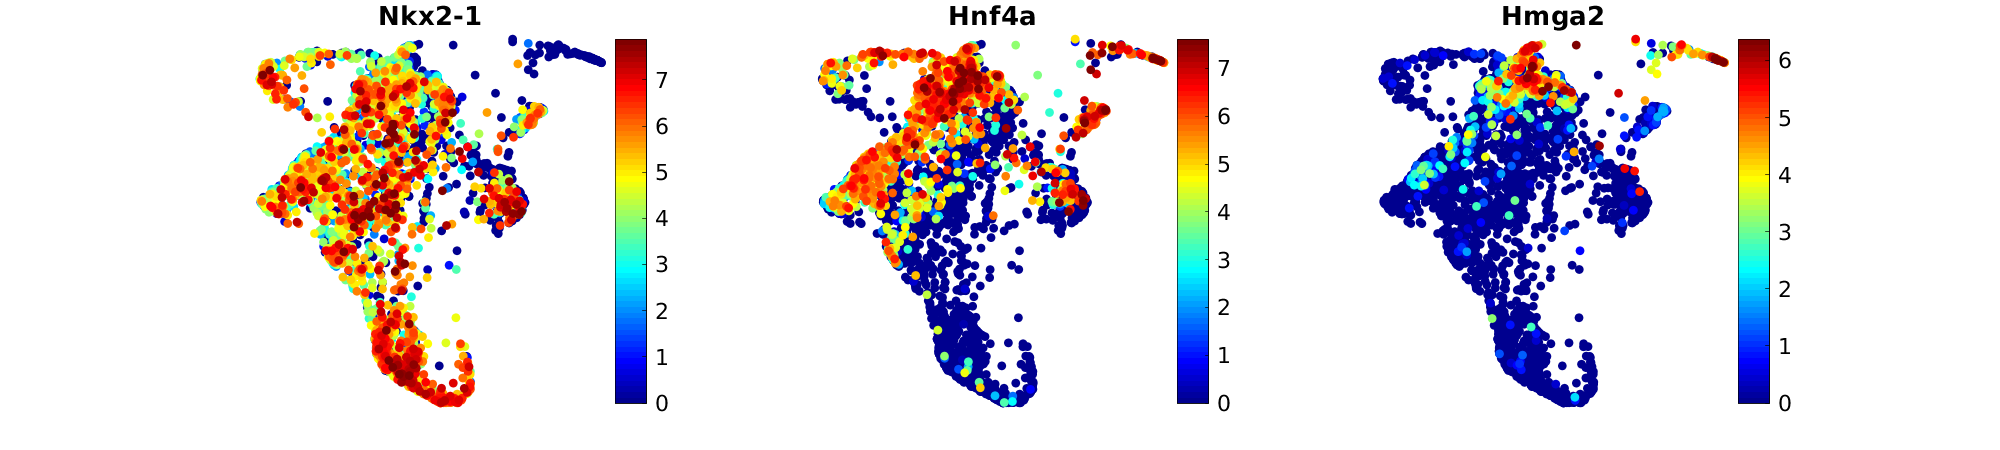

In [9]:
%plot -s 2000,450
%% Figure 2C

zGeneList = { 'Nkx2-1' 'Hnf4a' 'Hmga2' };

[~,zia,zib] = intersect(mmLungPlate_fQC.geneSymbol,zGeneList);
zord = zia(argsort(zib))

mmLungPlate_fQC.geneSymbol(zord)

%%

zExpM = mmLungPlate_fQC.normTPM(zord,:)';
zopts = [];
zopts.nRow = 1;
zopts.nCol = 3;
zopts.plotSize = [1 1 1999 443]
zopts.titleText = mmLungPlate_fQC.geneSymbol(zord);

zf = plot_tsne_scatter_multi(mmLungPlate_fQC.annot.phate,zExpM,[],[],zopts)


zOutCCnmf = 

  struct with fields:

              bestConsH: [11x3891 double]
                  consW: [4701x11 double]
                  testK: [42 23 16 11 8 8 7 5 4 3]
           reconstError: [10x1 double]
    reconstErrorPostOpt: [10x1 double]
               cMeanSil: [10x1 double]
           subStability: [1x1 struct]
         baseMergeClean: [4701x341 double]
                mergedW: {1x10 cell}
                extrapH: {1x10 cell}
               sampleID: {3891x1 cell}
              expandedW: {1x10 cell}
                 geneID: {52638x1 cell}
             geneSymbol: {52638x1 cell}
                listVar: [52638x1 logical]
           ccEnrichment: [1x1 struct]
                   ccTF: [1x1 struct]


zHeadType =

  11x1 cell array

    {'AT1_AT2'           }
    {'Cycling'           }
    {'Low_conf_1'        }
    {'Biosynthetic_mixed'}
    {'Stressed'          }
    {'Highly_mixed'      }
    {'EMT'               }
    {'GI_epithelium_like'}
    {'Hepatocyte_like'   }
   

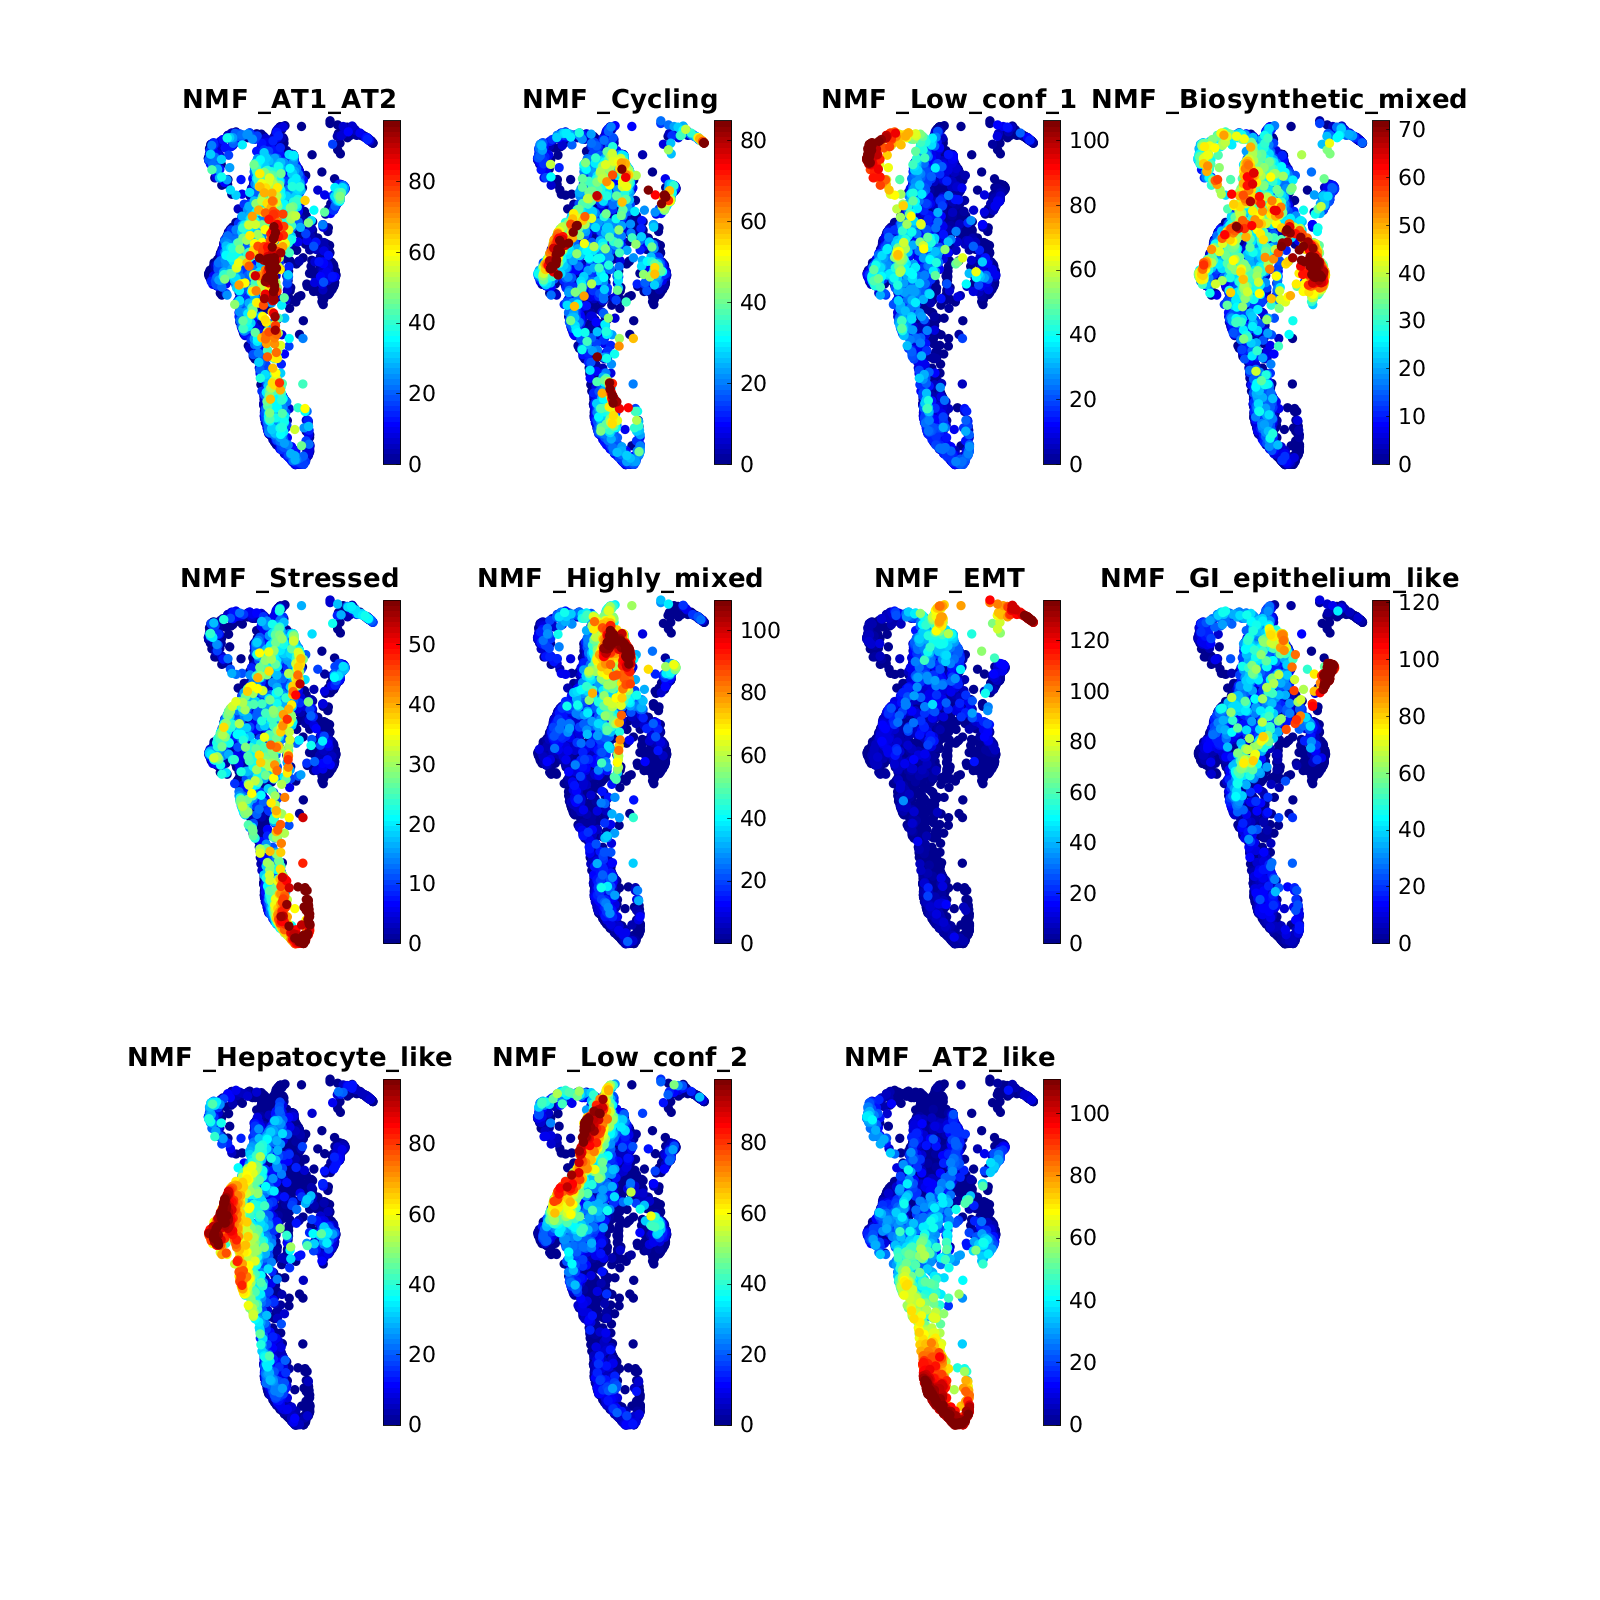

In [20]:
%plot -s 1600,1600
%% Figure 2D -- Consenus NMF programs 

runSection = 0;
if envVar.reRunAnalysis || runSection

    zOutP = [ envVar.outDir 'ccNMF_out/all_plate_ND' ];
    mkdir(fileparts(zOutP));

    zopts = [];

    % zopts.gsEnrichmentFile = '/ahg/regevdata/projects/Lung_ca_het/analysis/2018_11_14_plate_recluster/subCluster/geneSet_selected_mm.mat';
    % zopts.tfEnrichmentFile = '/ahg/regevdata/projects/Lung_ca_het/analysis/2018_11_14_plate_recluster/subCluster/TF_testSet_regnetworkweb.mat';

    zopts.optimalValSelect = -1;
    zopts.forceAll = 1
    zopts.enrichmentThr = 100;
    zopts.batchAwareCC = 0;

    zStub = 'mmLungPlate_ccNMF_top100';

    zopts.yData = mmLungPlate_fQC.annot.phate;
    zopts.Hnorm = 0;
    zopts.reWeightExpand = 1;

    zOutCCnmf = wrapper_ccNMF_enrichment(mmLungPlate_fQC,zSubClustNmf,zOutP,zopts,zStub,zClustIsT)
   
    zExpM = zOutCCnmf.bestConsH';
    
    zHeadType = mergeStringPair('NMF',size(zExpM,2));
    
    
else
    
    zOutCCnmf = load([ envVar.dataRoot 'mmLungKP_timecourse_ccNMF_summary.mat' ])

    zHeadType = { 'AT1_AT2'
        'Cycling'
        'Low_conf_1'
        'Biosynthetic_mixed'
        'Stressed'
        'Highly_mixed'
        'EMT'
        'GI_epithelium_like'
        'Hepatocyte_like'
        'Low_conf_2'
        'AT2_like'}
    
    zExpM = zOutCCnmf.extrapH{4}';
    zopts = [];


end

zopts.titleText = mergeStringPair('NMF ',zHeadType);

zf = plot_tsne_scatter_multi(mmLungPlate_fQC.annot.phate,zExpM,[],[],zopts)


zord =

       19588
       16802
       14006
       13941
        5814


ans =

  5x1 cell array

    {'Lyz2' }
    {'Hopx' }
    {'Cldn4'}
    {'Cldn2'}
    {'Zeb2' }


zopts = 

  struct with fields:

        nRow: 2
        nCol: 3
    plotSize: [1 1 1999 843]


zf =

  1x1 cell array

    {1x1 Figure}



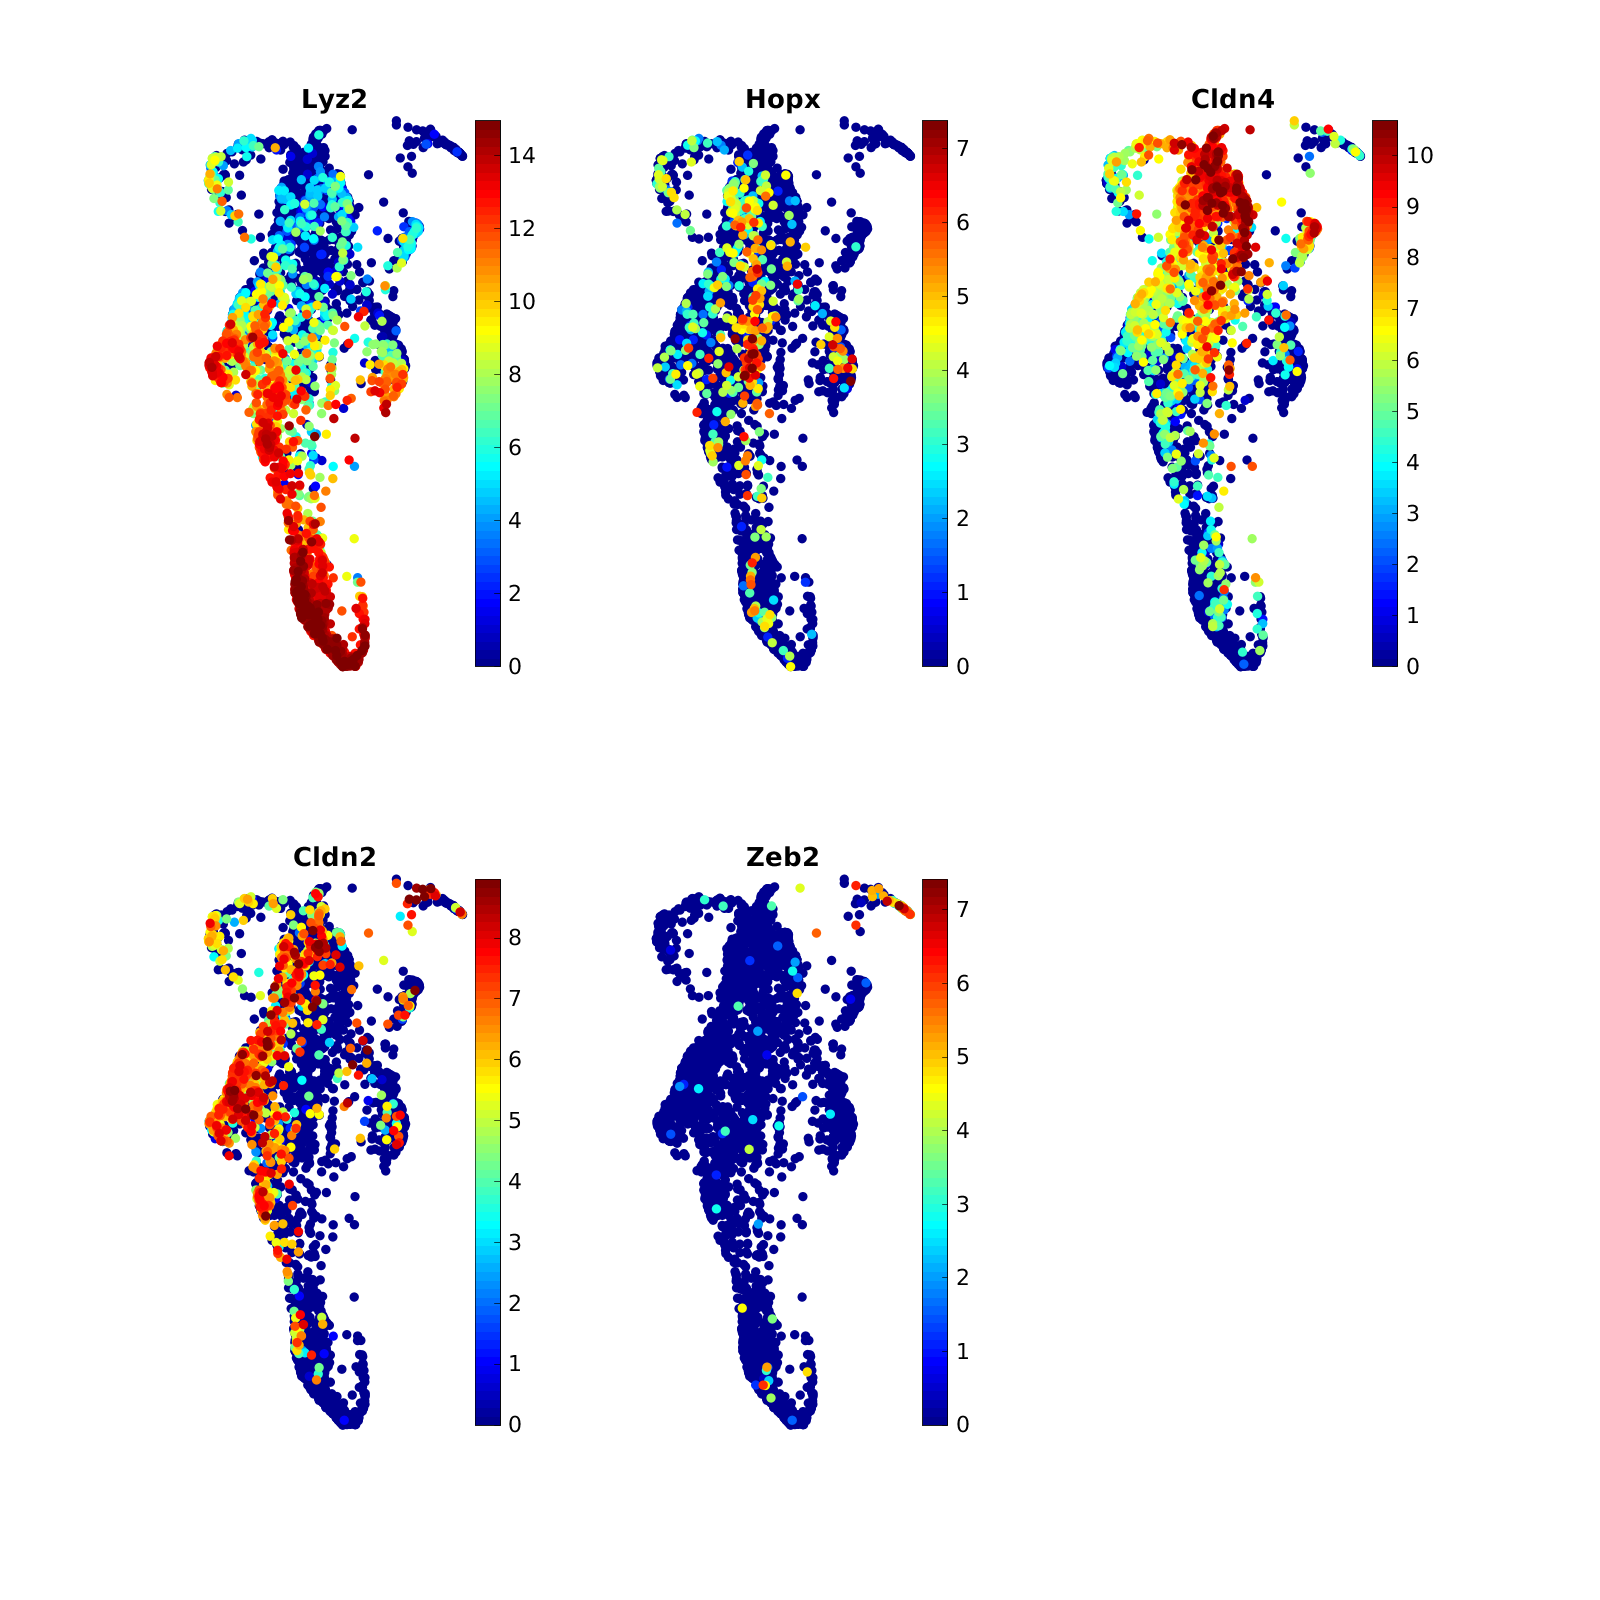

In [21]:
%plot -s 1600,1600
%% Figure 2E -- 

zGeneList = { 'Lyz2' 'Hopx' 'Cldn4' 'Cldn2' 'Zeb2' };

[~,zia,zib] = intersect(mmLungPlate_fQC.geneSymbol,zGeneList);
zord = zia(argsort(zib))

mmLungPlate_fQC.geneSymbol(zord)

%

zExpM = mmLungPlate_fQC.normTPM(zord,:)';
zopts = [];
zopts.nRow = 2;
zopts.nCol = 3;
zopts.plotSize = [1 1 1999 843]
zopts.titleText = mmLungPlate_fQC.geneSymbol(zord);

zf = plot_tsne_scatter_multi(mmLungPlate_fQC.annot.phate,zExpM,[],[],zopts)

               newPlot: 1
                maxRow: 12
                nSplit: 0
                widthV: 0.5000
              widthBox: 0.1000
                 dodge: 0
              outliers: 0
              whiskers: 0
                 notch: 0
              doJitter: 0.2000
                  ylim: []
              plotSize: [1 1 1600 900]
               reorder: 0
              reorderX: 1
           reorderXbyY: 0
               npoints: 30
                 title: []
                ylabel: ''
                xlabel: ''
             base_size: 12
             groupMode: 1
            dropLegend: 0
                  cmap: [12x3 double]
    XTickLabelRotation: []
             equalizeY: 1
             orderFunc: @(x)nanmedian(x(:))

Done - return

ans = 

  gramm with properties:

     legend_axe_handle: []
      title_axe_handle: []
    facet_axes_handles: []
               results: [1x1 struct]

Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Cust

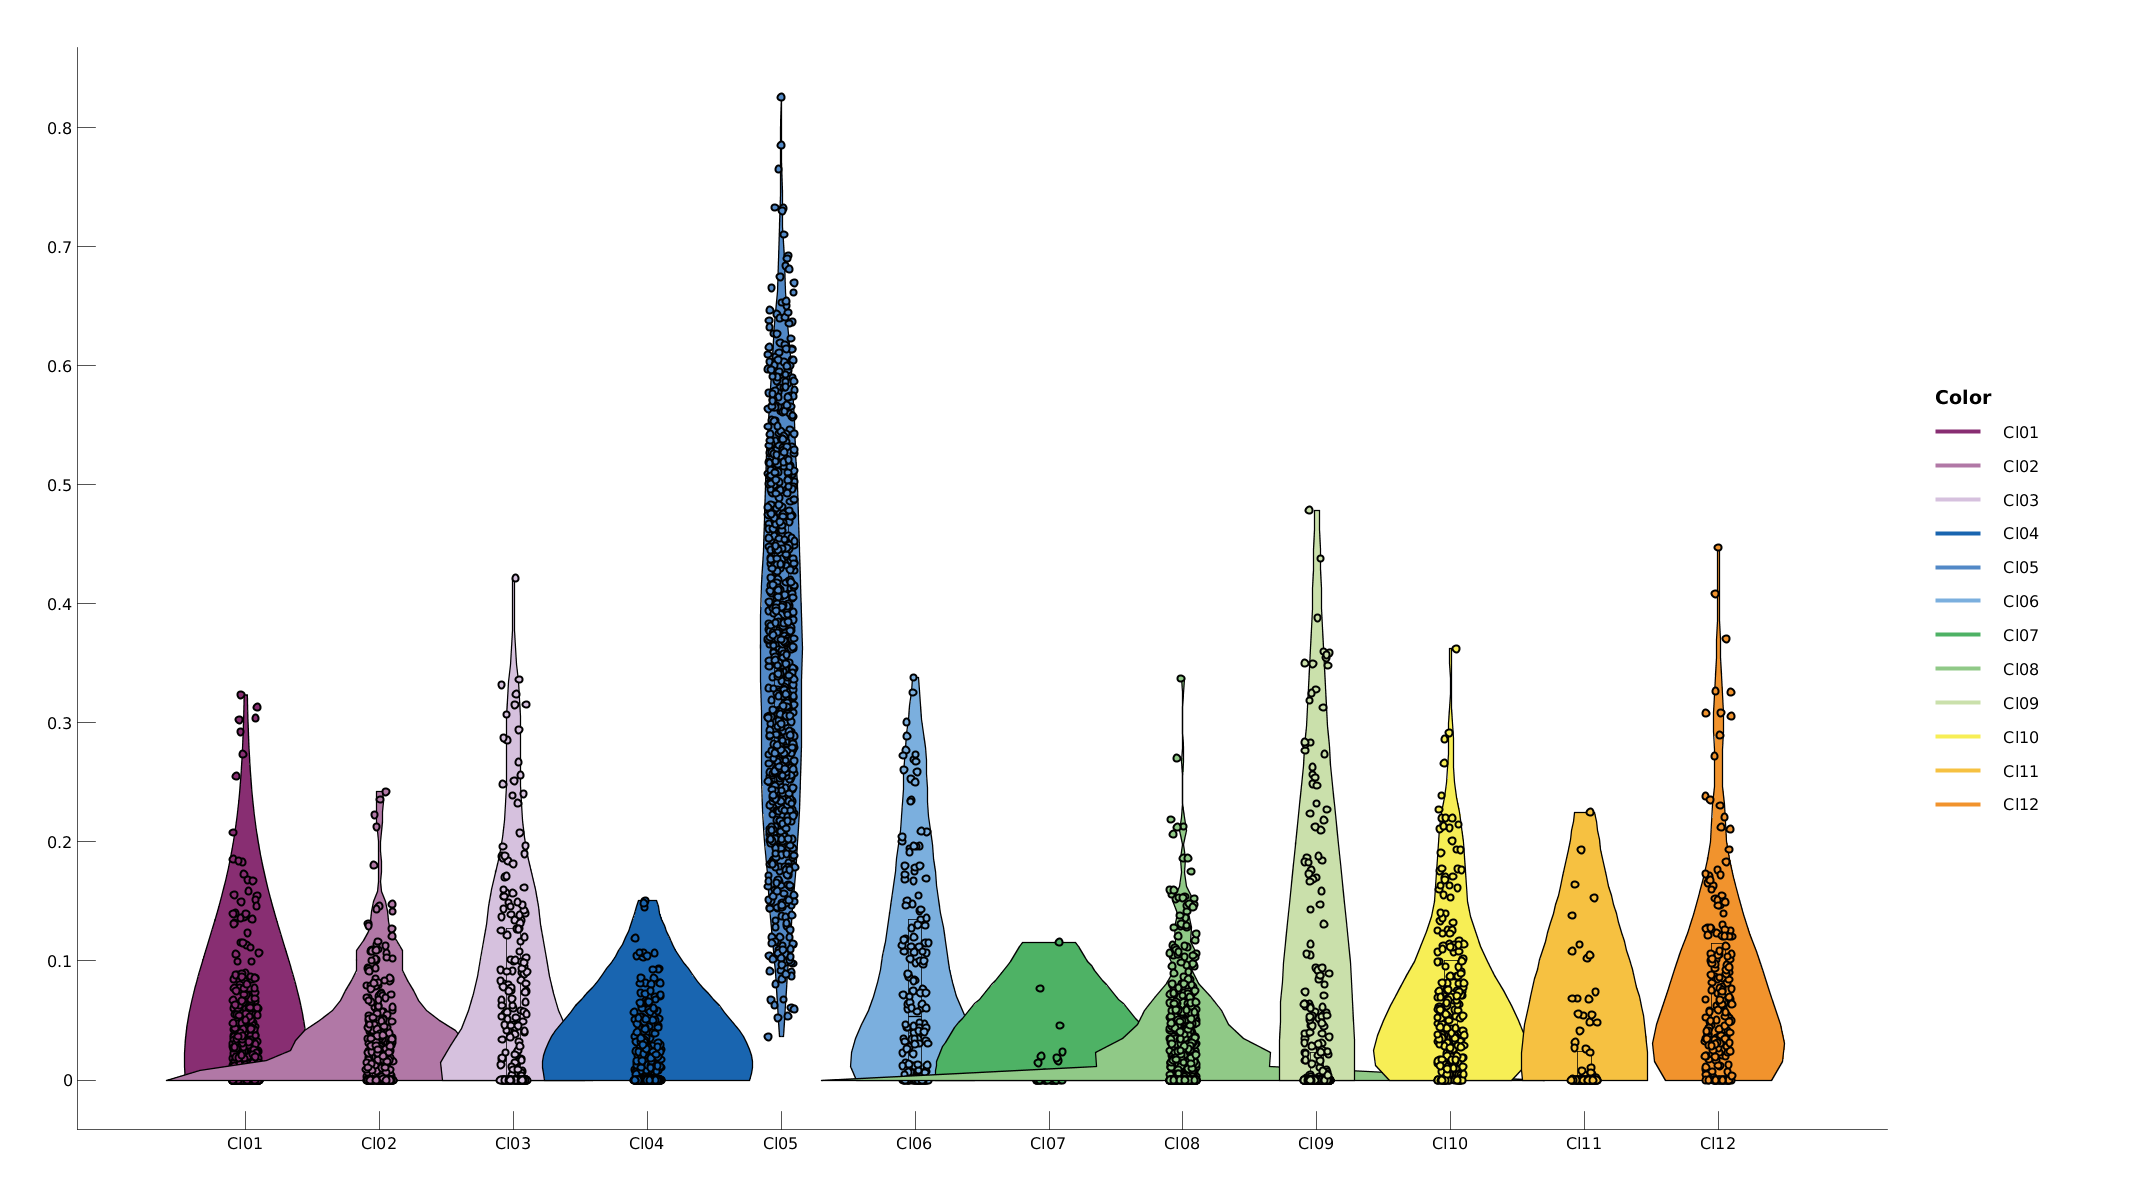

In [23]:
%plot -s 1600,500
%% Figure 2G

zopts = [];
zopts.maxRow = 12;
zopts.reorderX = 1;
zopts.widthV = 0.5;
zopts.widthBox = 0.1;
zopts.doJitter = 0.2;
zopts.dodge = 0;
zopts.cmap = colSet.cmapClust;
zopts.npoints = 30;
zopts.plotSize = [1 1 1600 900];
zCl = mergeStringPair('Cl%s%02d','',mmLungPlate_fQC.annot.clusterK12);

% plot_violin_simple(zCl,zOutCCnmf.extrapH{4}(6,:)',zCl,zopts)

plot_violin_simple(zCl,zOutCCnmf.bestConsH(6,:)',zCl,zopts)

In [24]:
%plot -s 1600,1600
%% Figure 2H

runSection = 0;
if envVar.reRunAnalysis || runSection
    % Todo: Add DEG with tweeDE model
    zDEG_all_ND = load([envVar.dataRoot 'mmLungKP_timecourse_plate_DEG_tweeDE.mat' ])

    %% 
    % Todo: Add wilcoxon based DEG

    zOutE = load([ envVar.dataRoot 'mmLungKP_timecourse_plate_DEG_ranksum.mat' ])    

    %%

    zDEG_pos = zDEG_all_ND.AUC > 0.6 & zDEG_all_ND.pval_adjust < 0.1 & zDEG_all_ND.log2fc > log2(1.25) & zDEG_all_ND.TRUE_freq > 0.05 & zOutE.maxLogR > log2(1);
    sum(zDEG_pos)
    sum(any(zDEG_pos,2))

    %%
    zopts = [];
    zopts.summaryGenes = 50;
    zopts.filterSubset = 10;   
    zopts.doWrite = 0;    
    [~,zSummaryTable] = extractWriteDEGtableByFlatIn(zOutE,mmLungPlate_fQC.geneSymbol,zDEG_pos,zDEG_all_ND.AUC,[],zopts)

    %% 

    zGeneListSt = table2cell(zSummaryTable);
    zGeneListSt = arrayfun(@(x)zGeneListSt(:,x),1:12,'unif',0);
    zGeneListSt = cell2struct(zGeneListSt',mergeStringPair('Cl%s%02d','',1:12))


else

    zGeneListSt = load([ envVar.dataRoot 'mmLungKP_timecourse_plate_DEG_top50_AUC.mat' ])
end


zGeneListSt = 

  struct with fields:

    Cl01: {50x1 cell}
    Cl02: {50x1 cell}
    Cl03: {50x1 cell}
    Cl04: {50x1 cell}
    Cl05: {50x1 cell}
    Cl06: {50x1 cell}
    Cl07: {50x1 cell}
    Cl08: {50x1 cell}
    Cl09: {50x1 cell}
    Cl10: {50x1 cell}
    Cl11: {50x1 cell}
    Cl12: {50x1 cell}



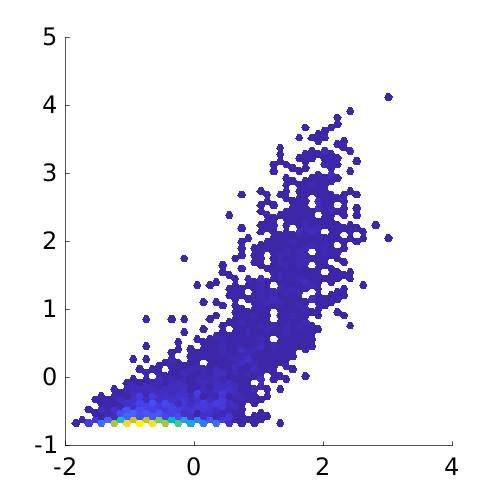

In [25]:
%plot -s 500,500
%% Gene signatures enrichment 
runSection = 0;
if envVar.reRunAnalysis || runSection
    
    zopts = [];
    zopts.geneID = 'geneSymbol';
    zopts.bkgScoreSmpNum = 1000;
    zGStestCellSelected = genSignatureScoreSimple(mmLungPlate_fQC,zGeneListSt,[],mmLungPlate_fQC.annot.clusterK12,zopts);
else
    zGStestCellSelected = load([ envVar.dataRoot 'mmLungKP_timecourse_GStest_clustSig.mat' ]);
end

%% 

figure;
hexscatter(zscore(zGStestCellSelected.outScore.Cl05),zscore(zOutCCnmf.extrapH{4}(6,:)'))
addLine()

%%


zCa =

  12x1 cell array

    {'Cl01'}
    {'Cl02'}
    {'Cl03'}
    {'Cl04'}
    {'Cl05'}
    {'Cl06'}
    {'Cl07'}
    {'Cl08'}
    {'Cl09'}
    {'Cl10'}
    {'Cl11'}
    {'Cl12'}


zCb =

  11x1 cell array

    {'AT1_AT2'           }
    {'Cycling'           }
    {'Low_conf_1'        }
    {'Biosynthetic_mixed'}
    {'Stressed'          }
    {'Highly_mixed'      }
    {'EMT'               }
    {'GI_epithelium_like'}
    {'Hepatocyte_like'   }
    {'Low_conf_2'        }
    {'AT2_like'          }

    newFigure: 1
        doSub: 1
       hexres: 30
      hexPlot: 1
     corrType: 'pearson'
         xlim: []
         ylim: []


zx =

  12x11 cell array

  Columns 1 through 5

    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}
    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}
    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}
    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}    {1x1 Patch}
    {1

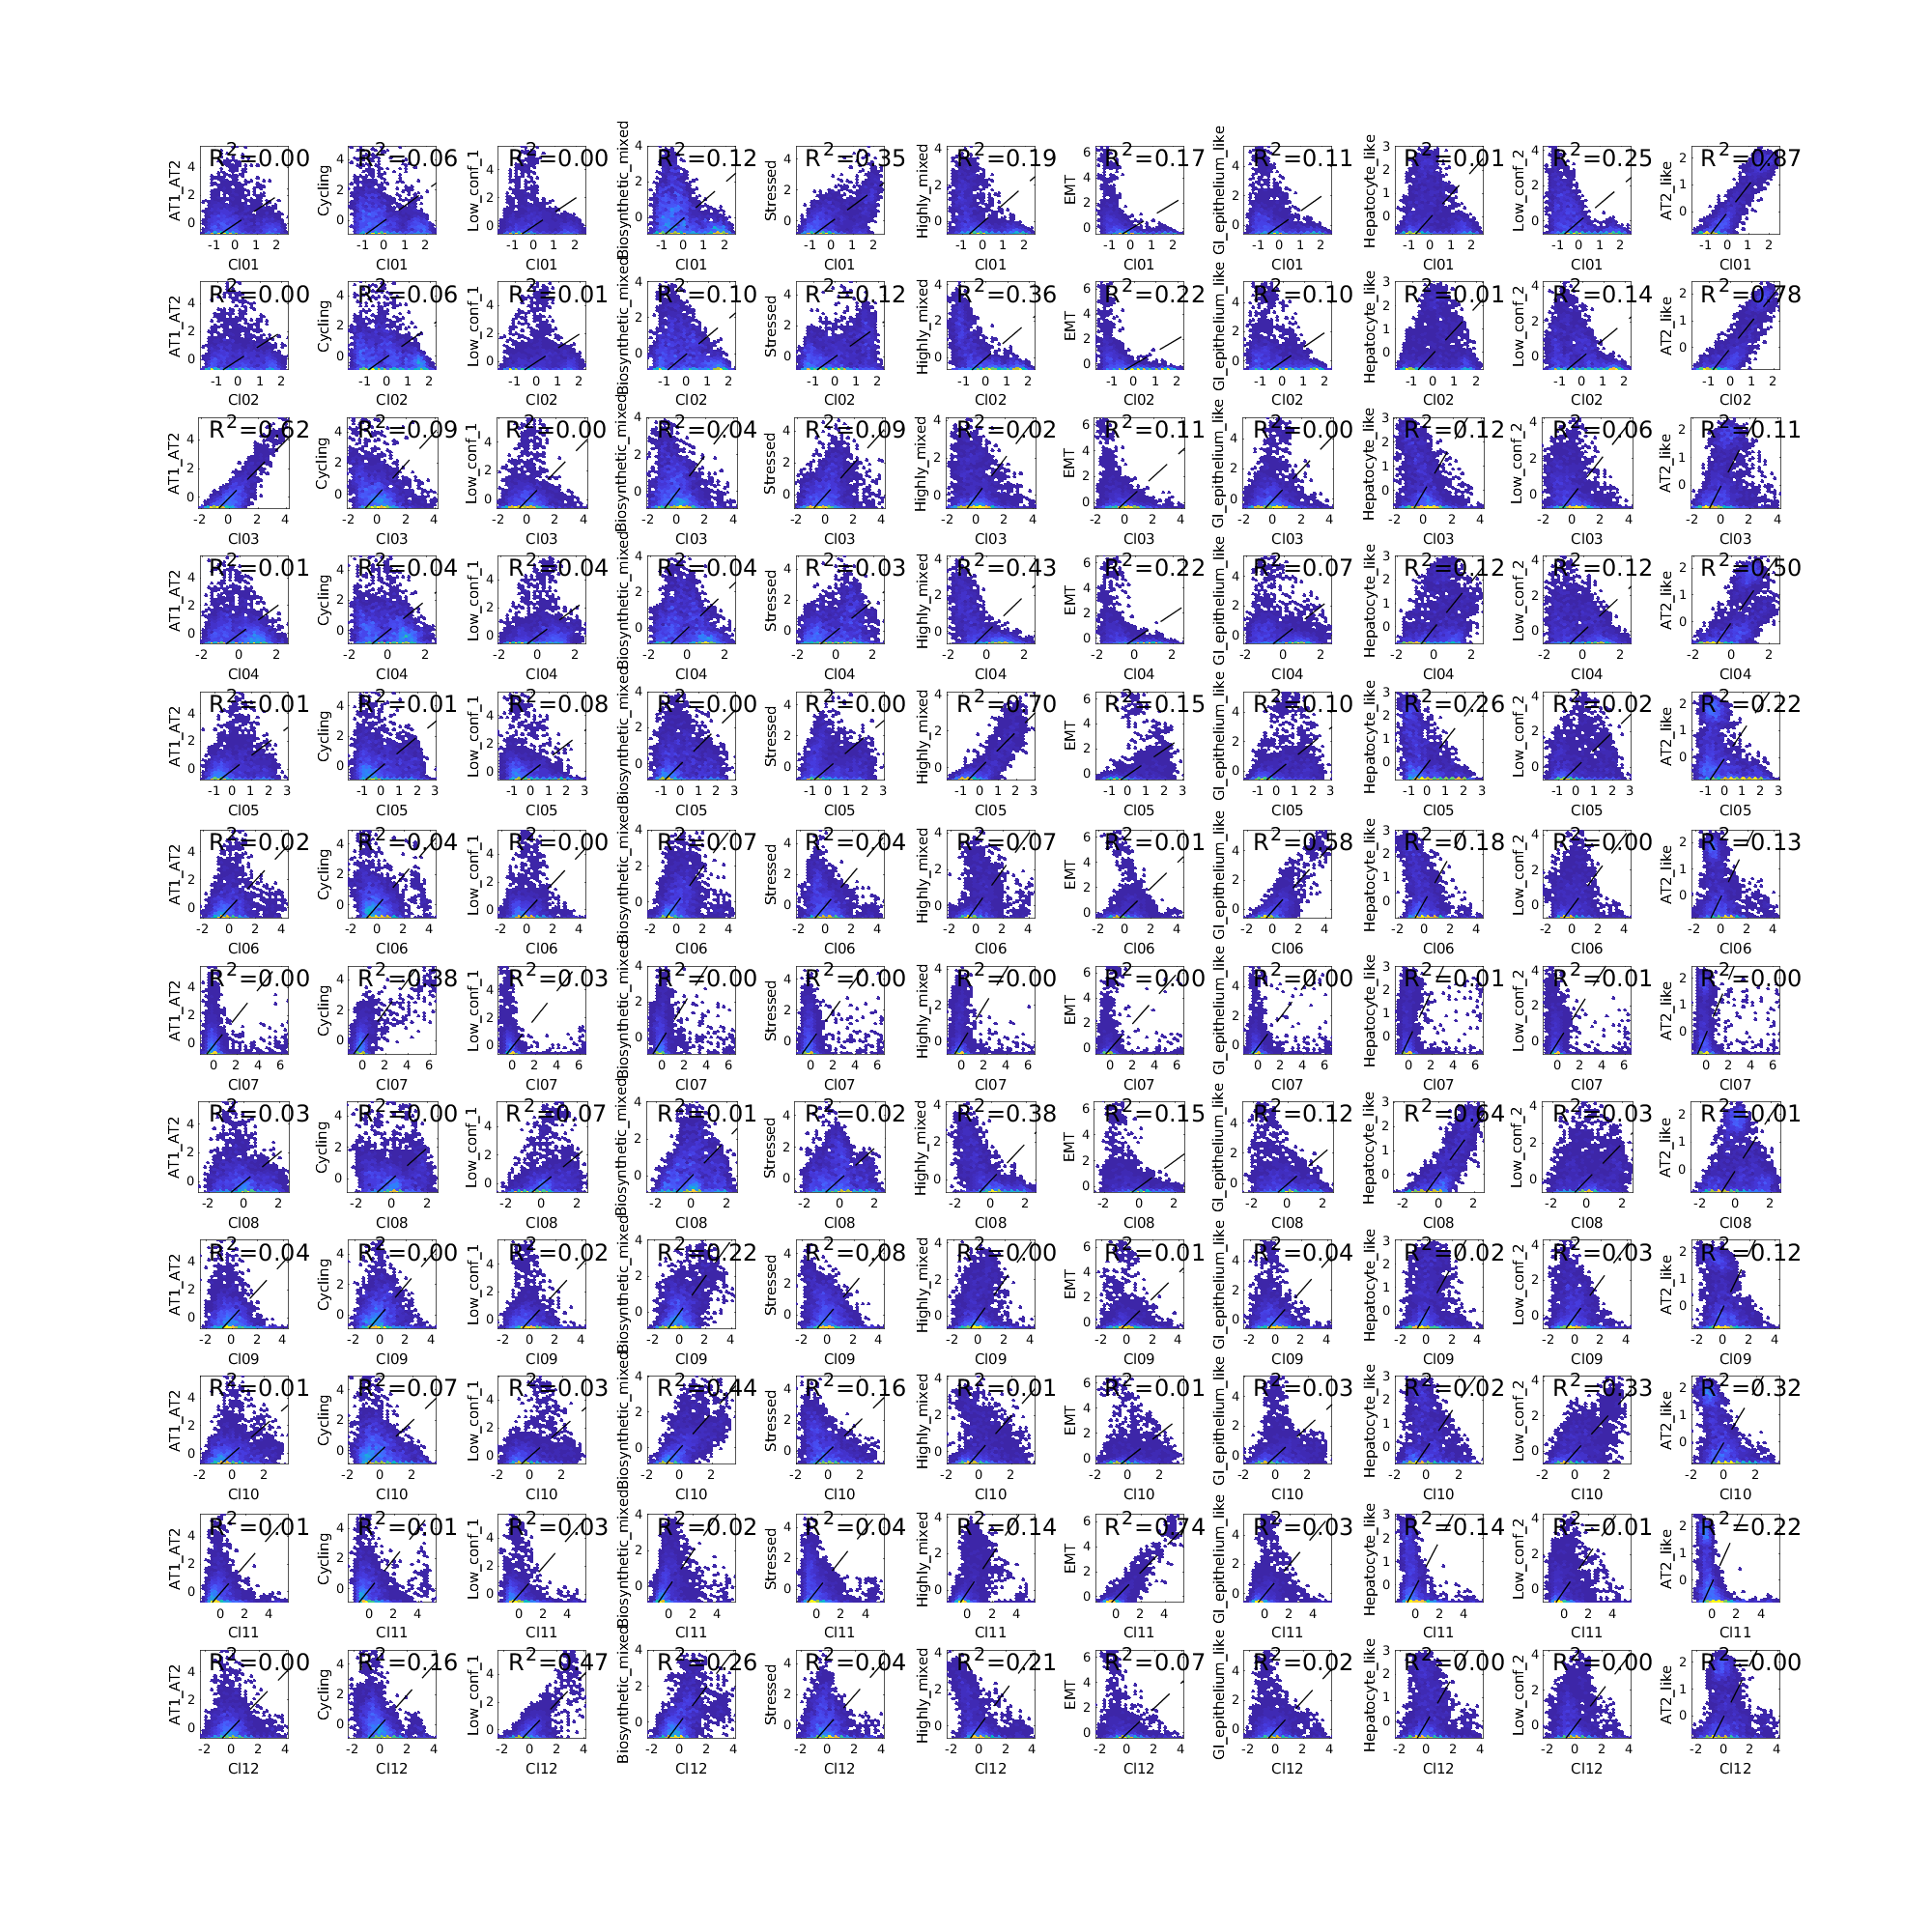

In [26]:
%plot -s 2000,2000
%% Gene signatures enrichment 

zDataA = zscore(struct2array(zGStestCellSelected.outScore));
zDataB = zscore(zOutCCnmf.extrapH{4}');
zCa = mergeStringPair('Cl%s%02d','',1:12) 
zCb = zHeadType

%%

zopts = [];
zopts.hexPlot = 1;
zx = plot_corr_scatter_pairs(zDataA,zCa,zDataB,zCb,zopts)

%%